In [1]:
from utils.binaries import *
from utils.plotting import *

15:37:35 (   +1.1s) [INFO   ] -- import logging
15:37:36 (  +175ms) [INFO   ] -- import numpy as np
15:37:36 (   +13ms) [INFO   ] -- import uncertainties
15:37:36 (  +461ms) [INFO   ] -- import pandas as pd
15:37:36 (    +1ms) [WARNING] -- pandas support to be dropped at some point!
15:37:36 (    +2ms) [INFO   ] -- import binaries.tools as tools
15:37:37 (  +555ms) [INFO   ] -- import matplotlib.pyplot as plt
15:37:38 (  +903ms) [INFO   ] -- import seaborn as so
15:37:38 (    +4ms) [INFO   ] -- set MONI_PATH = PosixPath('/cr/work/filip/monit_and_sd')
15:37:38 (    +1ms) [INFO   ] -- set HIST_PATH = PosixPath('/cr/work/filip/monit_and_sd')
15:37:38 (    +1ms) [INFO   ] -- set PLOT_PATH = PosixPath('/cr/data01/filip/plots')
15:37:38 (    +1ms) [INFO   ] -- set DATA_PATH = PosixPath('/cr/data01/filip/Data')
15:37:38 (    +1ms) [INFO   ] -- set SCAN_PATH = PosixPath('/cr/data01/filip/xy-calibration')
15:37:38 (    +1ms) [INFO   ] -- set OFLN_PATH = PosixPath('/cr/data01/filip/offline/insta

In [ ]:
def read_lcu(file: str) -> float:
    s = np.loadtxt(file, usecols=[-1])
    s = np.array(np.split(s, len(s) // 1024))[:, :1000]

    pulse_begin = np.argmax(np.diff(s), axis=1) - 5
    pulse_end = np.argmin(np.diff(s), axis=1) + 5
    baseline = 0

    for n_files, (trace, begin, end) in enumerate(zip(s, pulse_begin, pulse_end), 1):
        front, end = list(trace[:begin]), list(trace[end:])
        baseline += np.mean(front + end)

    return np.mean(np.sum(s - (baseline / n_files), axis=1))

579535.5619047619

In [42]:
import os
from datetime import datetime
from pathlib import Path

x, y = [], []
folder = Path("/cr/tempdata01/filip/LCUDATA/data/")
XY_start = datetime(2019,1,1)
for file in tools.ProgressBar(os.listdir(folder)):

    time = datetime.strptime(file[-20:-4], "%Y-%m-%d.%H-%M")
    if time < XY_start: continue

    x.append(time)
    y.append(read_lcu(folder / file))

8774/8774 [********************] || 00:00:22>00:00:00,       395.94 it/s


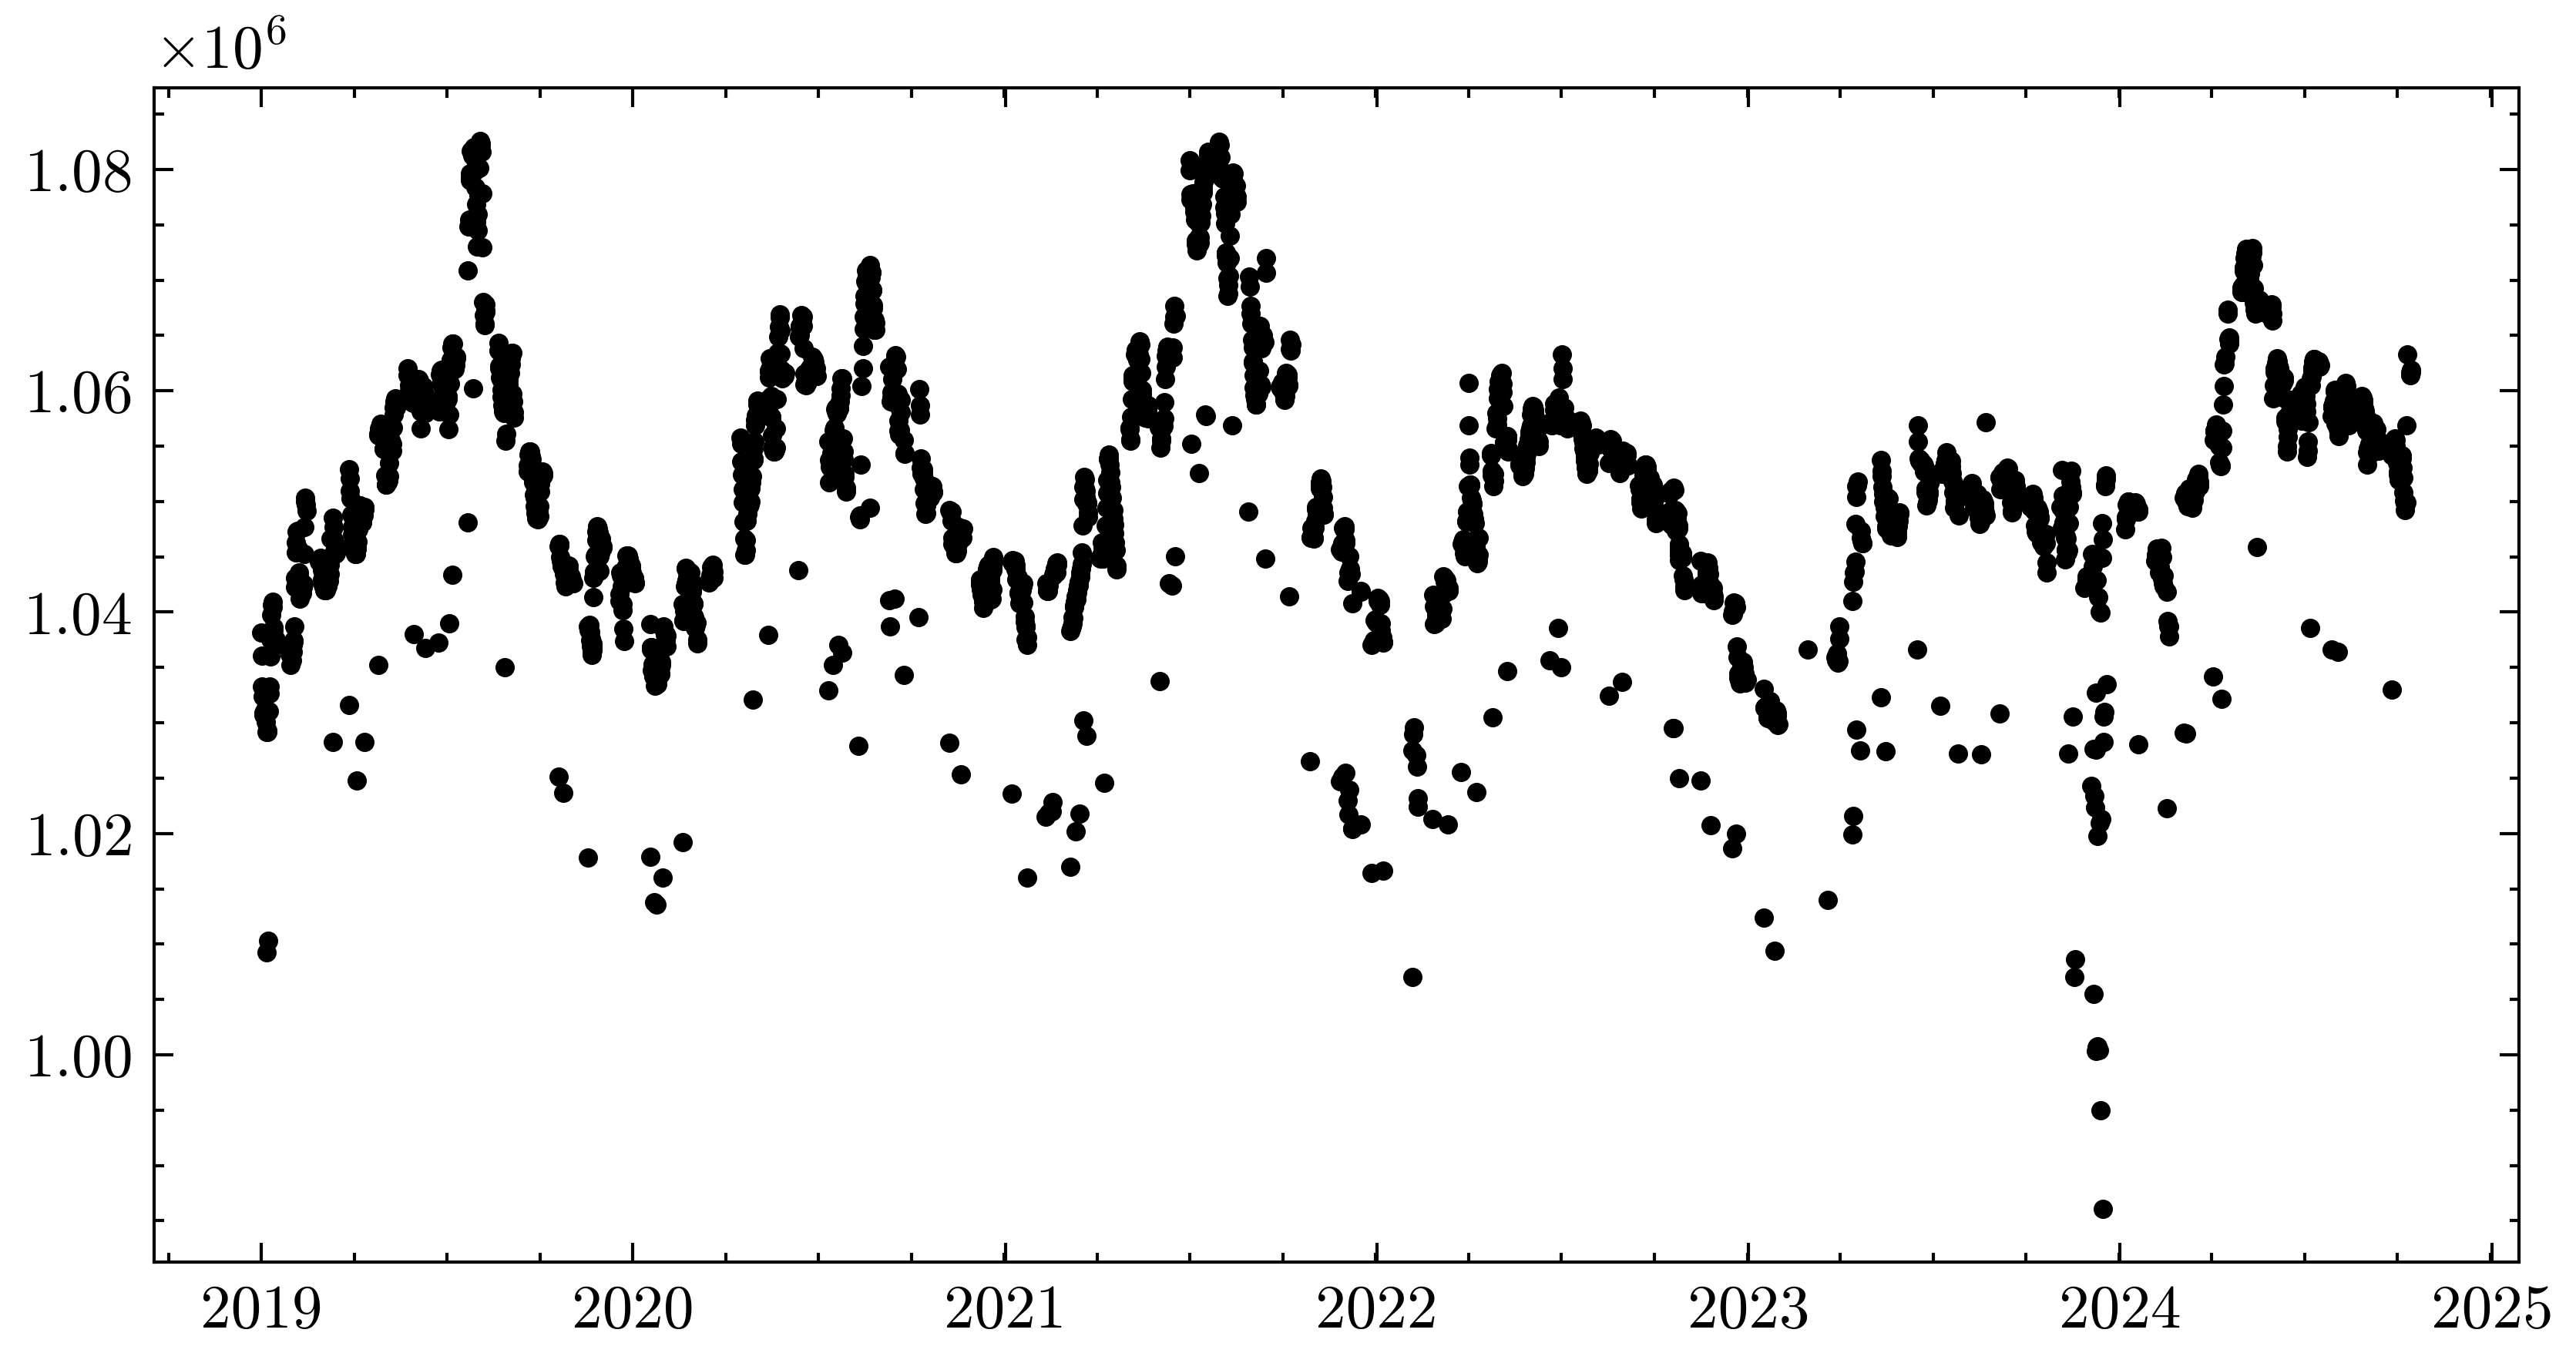

In [44]:
plt.scatter(x, y)
plot.apply_datetime_format(plt.gca())

In [45]:
print(x[-1])

2024-10-13 07:23:00
